## 对称网络

我们在上面创建的第一个演员网络是对称网络，因为“在电影中一起工作”的关系是对称关系。 如果A与B相关，则B也与A相关。让我们创建上面在NetworkX中看到的网络。我们将使用Graph（）方法创建新网络，并使用add_edge（）在两个节点之间添加边。


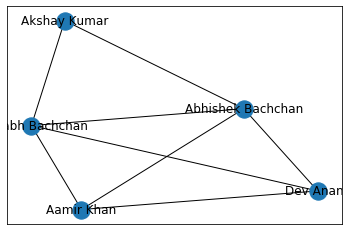

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Oct. 27, 2019

@author: 
"""

import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')
nx.spring_layout(G_symmetric)
nx.draw_networkx(G_symmetric)

## 不对称网络

如果节点之间的关系是'孩子'，那么关系就不再是对称的。 如果A是B的子节点，则B不是A的子节点。这种关系不对称的网络（A与B相关，并不一定意味着B与A相关联）被称为非对称网络。 我们可以使用DiGraph方法在NetworkX中构建非对称网络，该方法缺少方向图。 让我们制作一个非对称图。


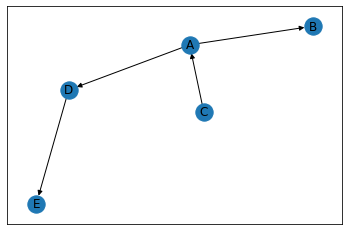

In [4]:

G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

nx.spring_layout(G_asymmetric)


nx.draw_networkx(G_asymmetric)

In [ ]:
## 加权网络

到目前为止，我们的网络没有权重，但网络可能是用权重制作的，例如，如果在我们的初始网络中我们将一起完成的电影数量视为权重，我们将获得一个加权网络。 让我们再次演绎演员，但这次我们为网络增加了重量，每个边缘都有一个重量，表示他们一起完成的电影数量。



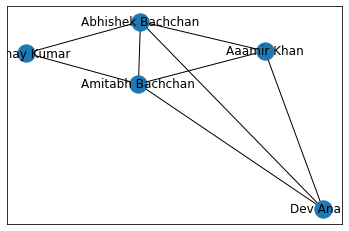

In [5]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)
nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

## degree
节点的度数定义节点具有的连接数。 NetworkX具有可用于确定网络中节点程度的功能度。

In [12]:
nx.degree(G_symmetric,'Dev Anand')


3

## 聚类系数
据观察，在社交网络中共享联系的人倾向于形成关联。换句话说，社交网络中存在形成集群的趋势。我们可以确定节点的集群，Local Clustering Coefficient，它是节点的朋友（即连接）彼此连接的对的一部分。为了确定局部聚类系数，我们使用nx.clustering（Graph，Node）函数。



In [16]:
print(nx.clustering(G_symmetric, 'Dev Anand'))

print(nx.clustering(G_symmetric,'Abhishek Bachchan'))

print(nx.average_clustering(G_symmetric))


1.0
0.6666666666666666
0.8666666666666666


## 距离

我们还可以分别使用nx.shortest_path（Graph，Node1，Node2）和nx.shortest_path_length（Graph，Node1，Node2）函数确定NetworkX中两个节点之间的最短路径及其长度。



In [18]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')


['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

我们可以使用广度优先搜索算法从该节点开始，找到节点与网络中每个其他节点的距离。 networkX提供了bfs_tree函数来完成它。因此，如果您尝试T = nx.bfs_tree（G_symmetric，'Dev Anand'）并现在绘制此树，我们将获得一个网络结构，告诉我们如何从Dev Anand开始到达网络的其他节点



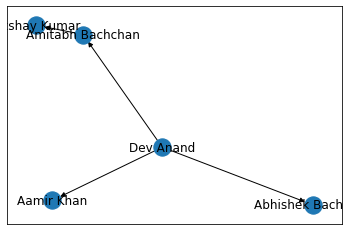

In [20]:
T = nx.bfs_tree(G_symmetric, 'Dev Anand')

nx.draw_networkx(T)

## 偏心率

节点A的偏心率被定义为A和所有其他节点之间的最大距离。 可以使用nx.eccentricity（）函数找到它。 在对称的Actor网络中，Dev Anand的偏心率为2，而Abhishek Bachchan的偏心率为1（它与所有人相连）。



In [26]:
nx.eccentricity(G_symmetric)


{'Amitabh Bachchan': 1,
 'Abhishek Bachchan': 1,
 'Aamir Khan': 2,
 'Akshay Kumar': 2,
 'Dev Anand': 2}